In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2)
gdp_df.head(10)

<ipython-input-2-a0c6cc3e9043>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=2)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,NaN
6,Afghanistan,2013,2116.465454,NaN
7,Afghanistan,2012,2075.491747,NaN
8,Afghanistan,2011,1904.559799,NaN
9,Afghanistan,2010,1957.029338,NaN


5. Added skipfooter = 2 to avoid the last two rows of the dataframe which had some footer data pertaining to the data exluded for South Sudan

In [3]:
gdp_df[-5:]

,Country or Area,Year,Value,Value Footnotes
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [4]:
gdp_df = (gdp_df
          .drop(columns = "Value Footnotes")
          .rename(columns={"Country or Area": "Country", "Value": "GDP_per_Capita"}))
                
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


7. Rows = 3, Columns 6867

Country is an object, Year is a interger, GDP_per_Capita is a float

In [5]:
print(gdp_df["Year"].min())

print(gdp_df["Year"].max())

1990
2019


In [6]:
gdp_df["Year"].value_counts(sort = True)

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

8. the number of observations increases from 1990 with 207 observations  until 2017 with 238. 2018 and 2019 decreased slightly with 237 and 231 observations, respectively. 

In [7]:
countries_of_gdp_df = gdp_df.drop_duplicates(subset="Country")
print(countries_of_gdp_df)

                  Country  Year  GDP_per_Capita
0             Afghanistan  2019     2065.036398
18                Albania  2019    13724.058790
48                Algeria  2019    11510.557088
78                 Angola  2019     6670.332297
108   Antigua and Barbuda  2019    21910.184985
...                   ...   ...             ...
6722              Vietnam  2019     8041.178551
6752   West Bank and Gaza  2019     6219.960291
6778                World  2019    16911.193295
6808               Zambia  2019     3470.448801
6838             Zimbabwe  2019     2835.948532

[238 rows x 3 columns]


9. 238 Countries are in the data set. Djibouti is represented the least. Several countries have 30 observations which is the most observations. They have fewer observations because they are small island countries or just small countries by land mass. 

In [8]:
gdp_df["Country"].value_counts(sort = True)

Kenya                        30
Malta                        30
Israel                       30
Vanuatu                      30
Fiji                         30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [9]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]

In [10]:
gdp_2014.describe()

,Year,GDP_per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


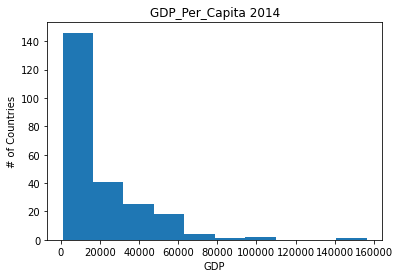

In [11]:
plt.hist(gdp_2014["GDP_per_Capita"], bins = 10)
plt.title("GDP_Per_Capita 2014")
plt.xlabel("GDP")
plt.ylabel("# of Countries")
plt.show;

12. Histogram description: Right skewed unimodal. 

In [12]:
countries_of_gdp_2014_srt = gdp_2014.drop_duplicates(subset="Country")
print(countries_of_gdp_2014_srt)

                  Country  Year  GDP_per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


In [13]:
countries_of_gdp_2014_srt.sort_values("GDP_per_Capita")

,Country,Year,GDP_per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541
...,...,...,...
561,Bermuda,2014,77361.104881
5464,Singapore,2014,87808.663157
5138,Qatar,2014,95578.416973
3691,Luxembourg,2014,108760.916030


13. 

Top 5: Macao, Luxumbourg, Qatar, Singapore, Bermuda

Bottom 5: Central African Republic, Burundi, Malawi, Dem Rep Congo, Niger.

In [14]:
gdp_pivoted = pd.pivot_table(gdp_df, 
                             values = "GDP_per_Capita" , 
                             columns = "Year", 
                             index = "Country")
print(gdp_pivoted);

Year                         1990          1991          1992          1993  \
Country                                                                       
Afghanistan                   NaN           NaN           NaN           NaN   
Albania               4842.734635   3507.746654   3275.444336   3610.520633   
Algeria               8746.352901   8431.385028   8383.770248   8027.376688   
Angola                5783.429064   5649.782130   5148.252824   3788.508107   
Antigua and Barbuda  15459.551675  15586.896172  15497.464744  15991.764201   
...                           ...           ...           ...           ...   
Vietnam               1673.249634   1736.014139   1847.620675   1957.644497   
West Bank and Gaza            NaN           NaN           NaN           NaN   
World                 9680.269697   9645.256163   9647.070526   9657.888486   
Zambia                2190.182814   2133.689042   2045.973257   2133.263108   
Zimbabwe              3324.348171   3426.598094   30

In [15]:
gdp_pivoted = gdp_pivoted[[1990,2017]]

In [16]:
gdp_pivoted = gdp_pivoted.dropna()

In [17]:
gdp_pivoted["Percent_Change"] = 100*(gdp_pivoted[2017]-gdp_pivoted[1990])/gdp_pivoted[2017]
print(gdp_pivoted)

Year                         1990          2017  Percent_Change
Country                                                        
Albania               4842.734635  12811.759436       62.200862
Algeria               8746.352901  11737.409353       25.483106
Angola                5783.429064   7310.901738       20.893082
Antigua and Barbuda  15459.551675  19840.076123       22.079172
Arab World            9694.667544  14555.474921       33.395045
...                           ...           ...             ...
Vanuatu               2888.309393   3116.645194        7.326333
Vietnam               1673.249634   7155.745829       76.616698
World                 9680.269697  16253.385518       40.441518
Zambia                2190.182814   3485.005238       37.154103
Zimbabwe              3324.348171   3028.245976       -9.778010

[207 rows x 3 columns]


In [18]:
gdp_pivoted_srt = gdp_pivoted.sort_values("Percent_Change")
gdp_pivoted_srt.head(20)

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1819.723315,1059.810775,-71.702662
United Arab Emirates,111454.360446,67183.626557,-65.895124
Burundi,1184.842440,773.571858,-53.165143
Ukraine,15751.722440,11871.123624,-32.689398
Central African Republic,1201.677234,912.802052,-31.647078
Tajikistan,3869.043636,3089.530208,-25.230808
Gabon,18179.265733,15006.764091,-21.140478
Congo,5115.210903,4274.296414,-19.673752
Madagascar,1853.051624,1584.422678,-16.954374


16. 17 countries experience a negative GDP perc change

In [19]:
gdp_pivoted.sort_values("Percent_Change", ascending = False)

Year,1990,2017,Percent_Change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,95.388314
China,1423.896348,14344.421239,90.073518
Myanmar,619.645144,4739.910118,86.927070
East Asia & Pacific (excluding high income),2173.223895,12986.322227,83.265286
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,83.258974
...,...,...,...
Central African Republic,1201.677234,912.802052,-31.647078
Ukraine,15751.722440,11871.123624,-32.689398
Burundi,1184.842440,773.571858,-53.165143


17. Equatorial Guinea had the highest perc change in GDP

In [20]:
gdp_guinea = gdp_df[gdp_df["Country"].isin(['Equatorial Guinea'])]
gdp_china = gdp_df[gdp_df["Country"].isin(['China'])]

In [21]:
print(gdp_china.head())
print(gdp_guinea.head())

     Country  Year  GDP_per_Capita
1162   China  2019    16092.300767
1163   China  2018    15242.985858
1164   China  2017    14344.421239
1165   China  2016    13487.822482
1166   China  2015    12691.821553
                Country  Year  GDP_per_Capita
1754  Equatorial Guinea  2019    18558.003852
1755  Equatorial Guinea  2018    20359.845144
1756  Equatorial Guinea  2017    22551.083246
1757  Equatorial Guinea  2016    24827.072978
1758  Equatorial Guinea  2015    28313.602763


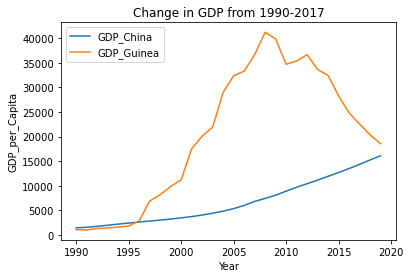

In [22]:
plt.plot(gdp_china["Year"], 
         gdp_china["GDP_per_Capita"])
plt.plot(gdp_guinea["Year"],
        gdp_guinea["GDP_per_Capita"]);
plt.xlabel("Year")
plt.ylabel("GDP_per_Capita")
plt.title("Change in GDP from 1990-2017")
plt.legend(["GDP_China", "GDP_Guinea"]);

In [23]:
continents = pd.read_csv('../data/continents.csv')

In [24]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [25]:
gdp_df.head()

,Country,Year,GDP_per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904


In [26]:
gdp_df = pd.merge(left = continents,
                 right = gdp_df,
                 on = 'Country');
gdp_df.head()

,Continent,Country,Year,GDP_per_Capita
0,Asia,Afghanistan,2019,2065.036398
1,Asia,Afghanistan,2018,2033.779002
2,Asia,Afghanistan,2017,2058.383832
3,Asia,Afghanistan,2016,2057.062164
4,Asia,Afghanistan,2015,2068.265904


In [27]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5443 entries, 0 to 5442
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Continent       5443 non-null   object 
 1   Country         5443 non-null   object 
 2   Year            5443 non-null   int64  
 3   GDP_per_Capita  5443 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 212.6+ KB


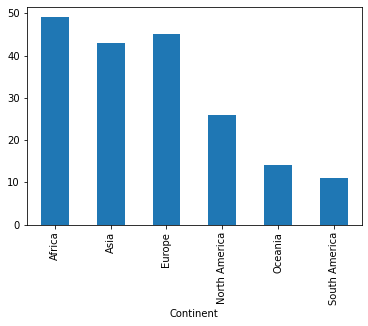

In [28]:
gdp_df.groupby("Continent")["Country"].nunique().plot(kind = 'bar');

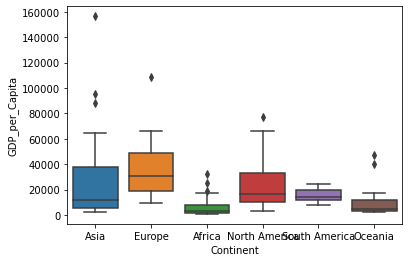

In [29]:
sns.boxplot(data = gdp_df.loc[gdp_df['Year'] == 2014], #loc for pulling out just the year 2014
            x = 'Continent',
            y = 'GDP_per_Capita');

In [30]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4500)

In [31]:
internet_df.head(-5)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN


In [32]:
internet_df = (internet_df
               .drop(columns = 'Value Footnotes')
               .rename(columns={"Country or Area": "Country", "Value": "Internet_Users_Pct"})
              .dropna())

In [44]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 140.5+ KB


In [43]:
internet_df["Year"] = pd.to_numeric(internet_df["Year"]) # Year was an object which was making my graphs have the years in descending order

In [34]:
internet_df[internet_df["Internet_Users_Pct"] > 0].sort_values("Year") 

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


1990 is the first year with a non-zero internet_users_pct

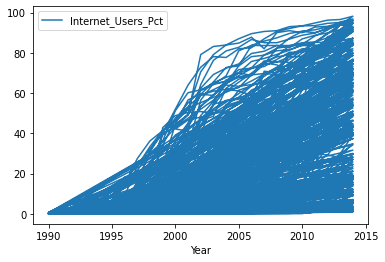

In [50]:
internet_df[internet_df["Internet_Users_Pct"] > 0].plot(kind = 'line',
                                                       x='Year',
                                                       y='Internet_Users_Pct');

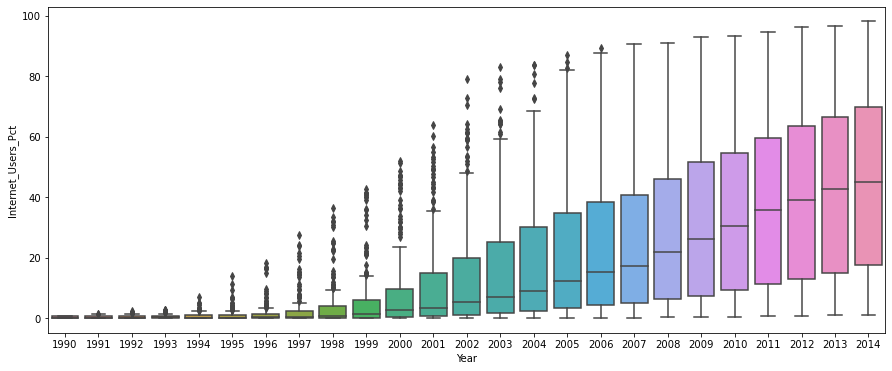

In [48]:
plt.figure(figsize = (15,6)) 
sns.boxplot(data = internet_df[internet_df["Internet_Users_Pct"] > 0],
           x = "Year",
           y = "Internet_Users_Pct");

In [63]:
internet_df["Log_Internet_Users_Pct"]=np.log(internet_df[internet_df["Internet_Users_Pct"] > 0 ]/ 100)

TypeError: unsupported operand type(s) for /: 'str' and 'int'